I started by using Data Analyst GPT environment that is created by ChatGPT team.
First i tried uploading the csv directly since it is a publicly available data from GoogleBigQuery and asked chatGPT for a summary but uploading csv directly doesn't seem to work due to security issues and technical constraint. As a workaround chatGPT suggested to paste the data directly or to use external tools like jupyter notebook, since the data I have is too big for chatGPT, i decided to ask chatGPT for data analysis using jupyter notebook.

below is the suggested steps by chatGPT with my analysis of the results in bold text

## 1. Setup and Load Data

In [ ]:
# Install necessary libraries (if not already installed)
!pip install pandas matplotlib seaborn numpy

In [2]:
# Import required libraries
import pandas as pd

# Load your CSV file
df = pd.read_csv('ecommerce-session-bigquery.csv') 

# View the first few rows of the dataset
df.head()

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,...,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN


**viewing the first few rows is a basic and good way to start an analysis to check the general state of the data. We can see that the data in the city column have value such as "(not set)" and "not available in demo dataset" which would need to be cleaned before starting the analysis**

## 2. Explore the Dataset

In [3]:
# Check the shape of the dataset (rows, columns)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Display column names
print("Columns:", df.columns)

# Summary of the dataset (data types, null values, etc.)
df.info()

# Statistical summary for numerical columns
df.describe()

Rows: 10000, Columns: 32
Columns: Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',
       'sessionQualityDim', 'date', 'visitId', 'type', 'productRefundAmount',
       'productQuantity', 'productPrice', 'productRevenue', 'productSKU',
       'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode',
       'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId',
       'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step', 'eCommerceAction_option'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                   

,fullVisitorId,time,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,productRefundAmount,...,productPrice,productRevenue,itemQuantity,itemRevenue,transactionRevenue,transactionId,searchKeyword,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
count,1.000000e+04,1.000000e+04,6.190000e+02,628.000000,9713.000000,9999.000000,19.000000,1.000000e+04,1.000000e+04,0.0,...,1.000000e+04,0.0,0.0,0.0,0.0,0.0,0.0,10000.000000,10000.0,0.0
mean,4.538050e+18,3.248462e+05,2.103635e+08,1.050955,720.119222,22.142114,50.210526,2.016097e+07,1.473169e+09,NaN,...,1.585565e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.071500,1.0,NaN
std,3.038982e+18,5.647221e+05,5.656026e+08,0.289005,967.997653,26.631372,32.481754,9.067598e+02,2.518655e+06,NaN,...,2.095339e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.363595,0.0,NaN
min,1.664653e+14,0.000000e+00,3.530000e+06,1.000000,1.000000,1.000000,1.000000,2.016080e+07,1.470036e+09,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
25%,1.701094e+18,4.252400e+04,5.508000e+07,1.000000,164.000000,7.000000,19.500000,2.016082e+07,1.471555e+09,NaN,...,4.990000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
50%,4.449181e+18,1.357180e+05,9.542000e+07,1.000000,383.000000,14.000000,62.000000,2.016090e+07,1.473019e+09,NaN,...,9.990000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
75%,7.170959e+18,3.542545e+05,1.866600e+08,1.000000,898.000000,27.000000,79.000000,2.016092e+07,1.474471e+09,NaN,...,1.599000e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
max,9.994767e+18,1.089403e+07,6.831960e+09,6.000000,15020.000000,429.000000,92.000000,2.017080e+07,1.501622e+09,NaN,...,9.999000e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.0,NaN


**another good way to be aware of the data in the dataset**

## 3. Check for Missing or Duplicated Data

In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing values (if necessary)
# df = df.dropna()

# Alternatively, fill missing values
# df['column_name'] = df['column_name'].fillna(0)  # Replace with appropriate value

# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Drop duplicates if needed
# df = df.drop_duplicates()

Missing Values:
 fullVisitorId                  0
channelGrouping                0
time                           0
country                        0
city                           0
totalTransactionRevenue     9381
transactions                9372
timeOnSite                   287
pageviews                      1
sessionQualityDim           9981
date                           0
visitId                        0
type                           0
productRefundAmount        10000
productQuantity             9955
productPrice                   0
productRevenue             10000
productSKU                     0
v2ProductName                  0
v2ProductCategory              0
productVariant                 0
currencyCode                 386
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
pageTitle                     92
searchKeyword              10000
pagePathLevel1                 0
eCommerceAction_type      

**data quality check for missing or duplicate value, useful but doesn't take into account data that is not null but have weird value since chatGPT doesn't have access to the data (such as the city column value being "(not set)" or "not available in demo dataset")**

Afterwards ChatGPT suggested a few basic analysis but since we already have a case studies, i decided to directly ask ChatGPT on solutions all three problems while copy pasting the top 5 row of data so ChatGPT can get better context, here are the results:

# Problem 1: Identify Top Products Based on the Total Transaction Revenue Per Day

## Step 1: Inspect the Dataset

From the dataset snippet you shared earlier, the key columns we will use are:

date: Indicates the day of the session.  
v2ProductName: Name of the product.  
totalTransactionRevenue: Total revenue for the session (per user).  
productRevenue or itemRevenue: Revenue attributed to individual products (if available).


**since we already have totalTransactionRevenue, the productRevenue or itemRevenue is redundant so the key column is just going to be date, v2ProductName, and totalTransactionRevenue**

## Step 2: Data Preprocessing

In [5]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Ensure that revenue-related columns are numeric
df['totalTransactionRevenue'] = pd.to_numeric(df['totalTransactionRevenue'], errors='coerce')
df['productRevenue'] = pd.to_numeric(df['productRevenue'], errors='coerce')
df['itemRevenue'] = pd.to_numeric(df['itemRevenue'], errors='coerce')

# Fill missing revenue values with 0 (if they are NaN)
df['totalTransactionRevenue'] = df['totalTransactionRevenue'].fillna(0)
df['productRevenue'] = df['productRevenue'].fillna(0)
df['itemRevenue'] = df['itemRevenue'].fillna(0)

**this is a necessary step since all the value is currently in a string format**

## Step 3 & 4: Group Data by Product and Date & Identify Top Products Per Day

In [6]:
# Group by 'date' and 'v2ProductName', summing up the revenue
daily_product_revenue = df.groupby(['date', 'v2ProductName'])['totalTransactionRevenue'].sum().reset_index()

# Sort the data by 'date' and 'totalTransactionRevenue' in descending order
daily_product_revenue = daily_product_revenue.sort_values(['date', 'totalTransactionRevenue'], ascending=[True, False])

# Get the top product per day
top_products_per_day = daily_product_revenue.groupby('date').head(1)  # Fetch the top product for each day

# Display the results
print(top_products_per_day)

           date                               v2ProductName  \
2    2016-08-01                             Chevron Shopper   
13   2016-08-02                             Chevron Shopper   
26   2016-08-03                             Chevron Shopper   
44   2016-08-04                            Google Lunch Bag   
53   2016-08-05                             Chevron Shopper   
...         ...                                         ...   
1166 2017-07-26                    Metal Texture Roller Pen   
1168 2017-07-27                    Metal Texture Roller Pen   
1169 2017-07-28  Google Women's Short Sleeve Hero Tee Black   
1171 2017-07-31                    Metal Texture Roller Pen   
1172 2017-08-01                   Google Snapback Hat Black   

      totalTransactionRevenue  
2                 144790000.0  
13                191200000.0  
26                        0.0  
44                113850000.0  
53                264780000.0  
...                       ...  
1166               

**since this is a relatively simple questions, i think ChatGPT handles it quite well and gives satisfactory results, but the usage of v2ProductName instead of productSKU could cause a grouping mistake. Below i am checking the amount of v2ProductName per productSKU**

In [7]:
# Count the number of unique v2ProductName per productSKU
unique_v2productnames = df.groupby('productSKU')['v2ProductName'].nunique().reset_index()

# Rename columns for clarity
unique_v2productnames.columns = ['productSKU', 'UniqueProductNames']

# Sort by the highest number of unique v2ProductName
unique_v2productnames = unique_v2productnames.sort_values('UniqueProductNames', ascending=False)

# Display the result
print(unique_v2productnames)

        productSKU  UniqueProductNames
45    GGOEGAAX0231                   2
69  GGOEGFSR022099                   2
56  GGOEGBJR018199                   2
58  GGOEGBMC056599                   2
60  GGOEGCBQ016499                   2
..             ...                 ...
24         9182784                   1
23         9182781                   1
22         9182772                   1
21         9182771                   1
75  GGOEYOBR078599                   1

[76 rows x 2 columns]


**Since we can see some product SKU have multiple product names, the results above might not be accurate. I would redo the same step but using the productSKU instead of v2ProductName for a more accurate results, and then reach out to the client on the proper productSKU to v2ProductName mapping.**

In [8]:
# Group by 'date' and 'productSKU', summing up the revenue
daily_product_revenue = df.groupby(['date', 'productSKU'])['totalTransactionRevenue'].sum().reset_index()

# Sort the data by 'date' and 'totalTransactionRevenue' in descending order
daily_product_revenue = daily_product_revenue.sort_values(['date', 'totalTransactionRevenue'], ascending=[True, False])

# Get the top product per day
top_products_per_day = daily_product_revenue.groupby('date').head(1)  # Fetch the top product for each day

# Display the results
print(top_products_per_day)

           date      productSKU  totalTransactionRevenue
5    2016-08-01  GGOEGBJR018199              144790000.0
19   2016-08-02  GGOEGBJR018199              191200000.0
26   2016-08-03    GGOEGAAX0037                      0.0
40   2016-08-04  GGOEGBCR024399              113850000.0
60   2016-08-05  GGOEGBJR018199              264780000.0
...         ...             ...                      ...
1156 2017-07-26         9180838               67570000.0
1158 2017-07-27         9180838               24710000.0
1160 2017-07-28         9180838                      0.0
1162 2017-07-31         9180838                      0.0
1163 2017-08-01         9181573                      0.0

[138 rows x 3 columns]


**I would also add how often a product SKU become top transaction revenue where the total transaction revenue is not 0 to shows which product would be beneficial to focus on**

In [9]:
top_products_per_day[top_products_per_day['totalTransactionRevenue'] > 0]['productSKU'].value_counts()

productSKU
GGOEGBJR018199    9
GGOEGBJC019999    7
GGOEGBCR024399    7
GGOEGBFC018799    6
GGOEGBJL013999    5
GGOEGAYR023499    3
GGOEGBMC056599    3
GGOEGBMB073799    3
GGOEGBMJ013399    3
GGOEGBJC014399    3
GGOEGCKQ013199    3
GGOEGAAX0037      3
GGOEGOCD078399    2
GGOEGAAX0168      2
GGOEGCBQ016499    2
9180838           2
GGOEGAAX0231      1
GGOEGFSR022099    1
GGOEGCLB020832    1
GGOEGCGB022199    1
GGOEYOBR078599    1
9182761           1
9183211           1
9182721           1
9183223           1
9182784           1
GGOEGBJB022599    1
9182569           1
GGOEAKDH019899    1
Name: count, dtype: int64

# Problem 2: Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.

In [10]:
# Aggregate transactions per product over time
transactions_per_product = df.groupby(['date', 'productSKU'])['transactions'].sum().reset_index()

# Fill missing or NaN transaction values with 0
transactions_per_product['transactions'] = transactions_per_product['transactions'].fillna(0)

# Sort by date for proper time-series analysis
transactions_per_product = transactions_per_product.sort_values(['productSKU', 'date'])

# Calculate the daily change in transactions for each product
transactions_per_product['daily_change'] = transactions_per_product.groupby('productSKU')['transactions'].diff()

# Add a column for the percentage change to better understand magnitude
transactions_per_product['percent_change'] = transactions_per_product.groupby('productSKU')['transactions'].pct_change() * 100

# Define thresholds for anomalies
threshold_percent_change = 50  # e.g., consider changes > 50% as anomalies
threshold_transaction_change = 10  # e.g., consider raw changes > 10 as anomalies

# Flag anomalies
transactions_per_product['anomaly'] = (
    (transactions_per_product['daily_change'].abs() > threshold_transaction_change) | 
    (transactions_per_product['percent_change'].abs() > threshold_percent_change)
)

# Filter only rows where anomalies are flagged
anomalies = transactions_per_product[transactions_per_product['anomaly']]

# Display anomalies
print(anomalies)


           date      productSKU  transactions  daily_change  percent_change  \
1160 2017-07-28         9180838           0.0          -1.0          -100.0   
1131 2017-04-16         9182721           1.0           1.0             inf   
1086 2017-01-05         9182761           0.0          -1.0          -100.0   
1145 2017-06-29         9182784           1.0           1.0             inf   
1126 2017-04-08         9183211           0.0          -1.0          -100.0   
...         ...             ...           ...           ...             ...   
835  2016-09-26  GGOEGPJC203399           1.0           1.0             inf   
859  2016-09-27  GGOEGPJC203399           0.0          -1.0          -100.0   
928  2016-09-30  GGOEGPJC203399           2.0           2.0             inf   
948  2016-10-01  GGOEGPJC203399           0.0          -2.0          -100.0   
1039 2016-10-05  GGOEYOBR078599           0.0          -1.0          -100.0   

      anomaly  
1160     True  
1131     True  
108

**The code above is the combination of several step from ChatGPT on how to detect anomalies, while the calculation is not wrong, we can see that the most of the results is -100% of inf, this is because there is not enough transaction per product and one transaction difference is enough to be detected as anomaly. below is a graph showing the total daily transaction by ChatGPT.**

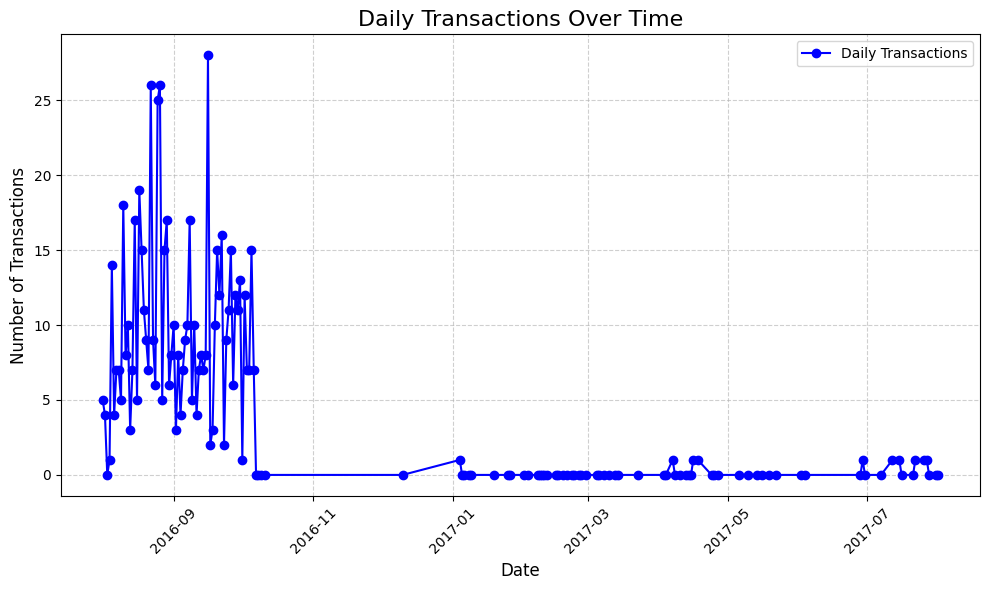

In [11]:
daily_transactions = df.groupby('date')['transactions'].sum().reset_index()

import matplotlib.pyplot as plt

# Plot daily transactions as a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions['date'], daily_transactions['transactions'], marker='o', linestyle='-', color='blue', label='Daily Transactions')

# Customize the plot
plt.title('Daily Transactions Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

**Seeing as the highest total transaction in a day doesn't even reach 30 on later months of 2016 and there's barely any transactions on 2017, i would conclude that we don't have enough data points to conclude anomalies of daily product transactions**

# Problem 3: Identify the most profitable city or province based on the total transaction revenue. 

**Since we don't have province data, I'm going to use city data instead**

In [12]:
# Group by city and sum the total transaction revenue
revenue_by_city = df.groupby('city')['totalTransactionRevenue'].sum().reset_index()

# Sort the cities by revenue in descending order
revenue_by_city = revenue_by_city.sort_values('totalTransactionRevenue', ascending=False)

# Display the top 10 most profitable cities
print("Top 10 Most Profitable Cities by Total Transaction Revenue:")
print(revenue_by_city.head(11))

Top 10 Most Profitable Cities by Total Transaction Revenue:
                              city  totalTransactionRevenue
170  not available in demo dataset             6.510244e+10
104                       New York             2.125081e+10
135                  San Francisco             7.774340e+09
98                   Mountain View             5.713290e+09
160                        Toronto             5.427980e+09
34                         Chicago             4.621840e+09
8                        Ann Arbor             3.898660e+09
11                         Atlanta             3.182210e+09
85                       Maracaibo             2.853540e+09
79                     Los Angeles             1.674930e+09
152                      Sunnyvale             1.344590e+09


**some of the city value is unavailable but I still prefer to include the value to highlight the amount of missing data to the client**

**Alternatively we can show the same data but uses Country data instead since the data is relatively cleaner**


In [13]:
# Group by country and sum the total transaction revenue
revenue_by_country = df.groupby('country')['totalTransactionRevenue'].sum().reset_index()

# Sort the countries by revenue in descending order
revenue_by_country = revenue_by_country.sort_values('totalTransactionRevenue', ascending=False)

# Display the top 10 most profitable countries
print("Top 10 Most Profitable Countries by Total Transaction Revenue:")
print(revenue_by_country.head(10))

Top 10 Most Profitable Countries by Total Transaction Revenue:
            country  totalTransactionRevenue
101   United States             1.104420e+11
103       Venezuela             1.004466e+10
16           Canada             8.142560e+09
92           Taiwan             7.971000e+08
22          Curaçao             2.083300e+08
0         (not set)             1.823000e+08
17            Chile             1.137900e+08
100  United Kingdom             9.596000e+07
81     Saudi Arabia             6.797000e+07
91      Switzerland             5.104000e+07


**Since the problem is relatively simple, the results from chatGPT could be used as is**